In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
pima = pd.read_csv("../diabetes.csv")
print(pima.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Split the data into features (X) and target variable (y)
X = pima.drop(columns='Outcome')
y = pima['Outcome']

In [4]:
# Number of negative and positive cases in the data
num_obs = len(pima)
negative = len(pima.loc[pima['Outcome'] == 0])
positive = len(pima.loc[pima['Outcome'] == 1])
print("Number of negative cases:  {0} ({1:2.2f}%)".format(negative, ((1.00 * negative)/(1.0 * num_obs)) * 100))
print("Number of positve cases:  {0} ({1:2.2f}%)".format(positive, ((1.00 * positive)/(1.0 * num_obs)) * 100))

Number of negative cases:  500 (65.10%)
Number of positve cases:  268 (34.90%)


In [5]:
#Arrange Data using MinMax 
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() 
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)

StandardScaler()


In [6]:
# Split xscale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscale, y, test_size= 0.2, random_state = 0) 

In [7]:
# Number of each case in the data training and testing
print("Original negative : {0} ({1:0.2f}%)".format(len(pima.loc[pima['Outcome'] == 0]), (len(pima.loc[pima['Outcome'] == 0])/len(pima.index)) * 100.0))
print("Original positive : {0} ({1:0.2f}%)".format(len(pima.loc[pima['Outcome'] == 1]), (len(pima.loc[pima['Outcome'] == 1])/len(pima.index)) * 100.0))
print("")
print("Training negative : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("Training positive : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("")
print("Test negative     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))
print("Test positive     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))

Original negative : 500 (65.10%)
Original positive : 268 (34.90%)

Training negative : 393 (64.01%)
Training positive : 221 (35.99%)

Test negative     : 107 (69.48%)
Test positive     : 47 (30.52%)


In [8]:
from sklearn.metrics import confusion_matrix
import math
def evaluate(Y_true, Y_predict):
    tn, fp, fn, tp = confusion_matrix(Y_true,Y_predict).ravel()
    acc = (tp +tn)/ (tp + tn + fn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = (2*tp)/(2*tp + fp + fn)
    specificity = tn / (fp + tn) 
    MCC = ((tp*tn) - (fp*fn)) / math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    return acc, precision, recall, f1_score, specificity, MCC

In [14]:
from sklearn.linear_model import LogisticRegression

def Diabetes(output = ['Outcome']):

  #LR
  #----------------------------------------------
  LR = LogisticRegression()
  LR.fit(X_train, y_train)
  yhatLR = LR.predict(X_test)

  acc, precision, recall, f1_score, specificity, MCC = evaluate(y_test, yhatLR)
  print(output, ' LR      acc:  {:.04f}    precision:   {:.04f}    recall :   {:.04f}   f1_score:   {:.04f}  specificity:   {:.04f}  MCC:   {:.04f}'.format(acc, precision, recall, f1_score, specificity, MCC))

  return LR, yhatLR


In [15]:
Diabetes(output = ['Outcome'])
print('------------')

['Outcome']  LR      acc:  0.8247    precision:   0.7632    recall :   0.6170   f1_score:   0.6824  specificity:   0.9159  MCC:   0.5692
------------


['Outcome']  LR      acc:  0.8247    precision:   0.7632    recall :   0.6170   f1_score:   0.6824  specificity:   0.9159  MCC:   0.5692


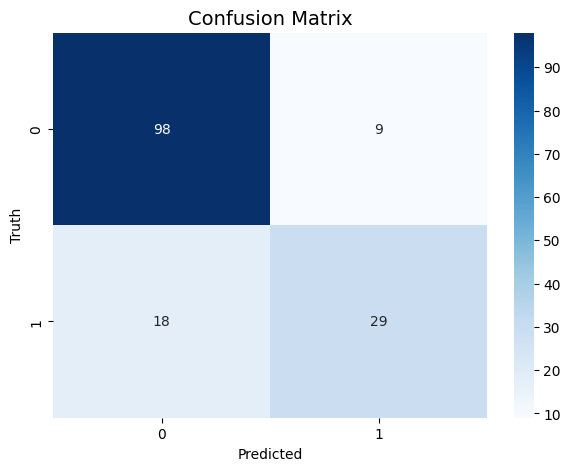

In [17]:
# Call the function
LR, yhatLR = Diabetes()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatLR)

# Plot confusion matrix using seaborn
plt.figure(figsize=(7,5))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

# Set labels
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [74]:
# [[89  13],
#  [27 25]]
114/154

0.7402597402597403

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, yhatLR))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [69]:
pima = pima.sample(frac=1)
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
674,8,91,82,0,0,35.6,0.587,68,0
614,11,138,74,26,144,36.1,0.557,50,1
517,7,125,86,0,0,37.6,0.304,51,0
531,0,107,76,0,0,45.3,0.686,24,0
759,6,190,92,0,0,35.5,0.278,66,1
...,...,...,...,...,...,...,...,...,...
505,10,75,82,0,0,33.3,0.263,38,0
439,6,107,88,0,0,36.8,0.727,31,0
286,5,155,84,44,545,38.7,0.619,34,0
253,0,86,68,32,0,35.8,0.238,25,0


In [71]:
cl1 = pima[:384]
cl2 = pima[384:]

In [72]:
cl2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
720,4,83,86,19,0,29.3,0.317,34,0
619,0,119,0,0,0,32.4,0.141,24,1
510,12,84,72,31,0,29.7,0.297,46,1
362,5,103,108,37,0,39.2,0.305,65,0
141,5,106,82,30,0,39.5,0.286,38,0
...,...,...,...,...,...,...,...,...,...
505,10,75,82,0,0,33.3,0.263,38,0
439,6,107,88,0,0,36.8,0.727,31,0
286,5,155,84,44,545,38.7,0.619,34,0
253,0,86,68,32,0,35.8,0.238,25,0


In [73]:
cl1.to_csv('./cl1.csv', encoding='utf-8')
cl2.to_csv('./cl2.csv', encoding='utf-8')

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
model8=GradientBoostingClassifier()
model8.fit(X_train,y_train)
gradientY_predict=model8.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score,classification_report

print(classification_report(gradientY_predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



In [91]:
from xgboost import XGBClassifier
modelx = XGBClassifier(booster="gbtree",n_estimator=[10], max_depth=3, objective='binary:logistic', use_label_encoder=False )
modelx.fit(X_train, y_train)
gradientY_predict=modelx.predict(X_test)

c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [17:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [92]:
print(classification_report(gradientY_predict,y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.74      0.67      0.71        52

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [93]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [97]:
import numpy as np
xgb_params = {
    "learning_rate": [0.01],
    "min_samples_split": [0.1],
    "max_depth":[8],
    "subsample":[ 1.0],
    "n_estimators": [1000]}

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [101]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X_train,y_train)

In [102]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.7552631578947369